<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Eq_do_Contraste_(usando_pyccl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outra forma de plotar o contraste $\delta_m$ é usar a biblioteca pyccl do Python, voltada para cálculos da Cosmologia. Porém, como esta biblioteca não tem no colab, é necessário instalar através dos comandos abaixo.

In [52]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [53]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch  

In [54]:
import pyccl as ccl

In [55]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.33, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

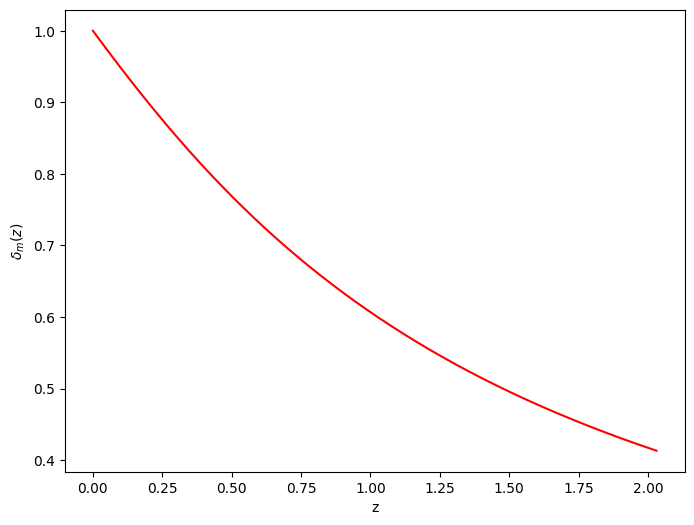

In [56]:
# definindo o redshift em função do fator de escala
z = (1/a) - 1.

# plotando o gráfico de delta x z
plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.ylabel('$\delta_m(z)$')
plt.plot(z, delta, color='red')
plt.show()

Porém, $\delta_m$ não é um observável. Como queremos comparar os modelos alternativos com dados, precisamos da função $f$, defininda como:

$f(a) = \frac{d ln(\delta_m)}{d ln(a)}$.

Este parâmetro é um observável cosmológico e é chamado de função taxa de crescimento de estruturas.

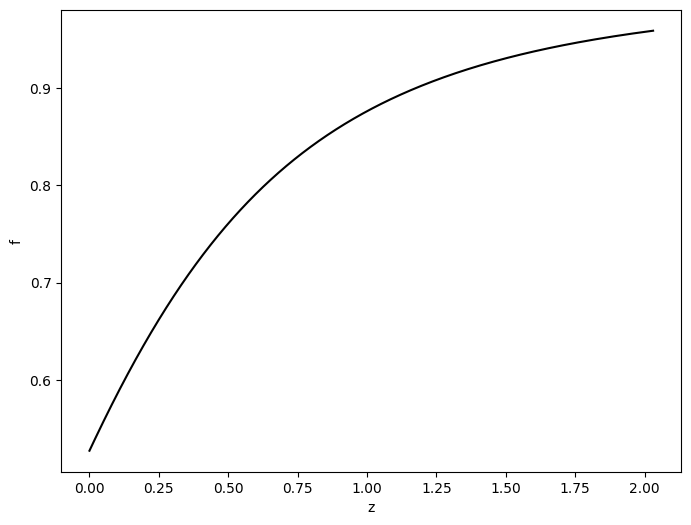

In [57]:
# definindo f com a biblioteca pyccl
f = ccl.background.growth_rate(cosmo, a)

# plotando f
plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.ylabel('f')
plt.plot(z, f, color='black')
plt.show()

Agora, vamos comparar a função taxa de crescimento $f$ com a função $g$.

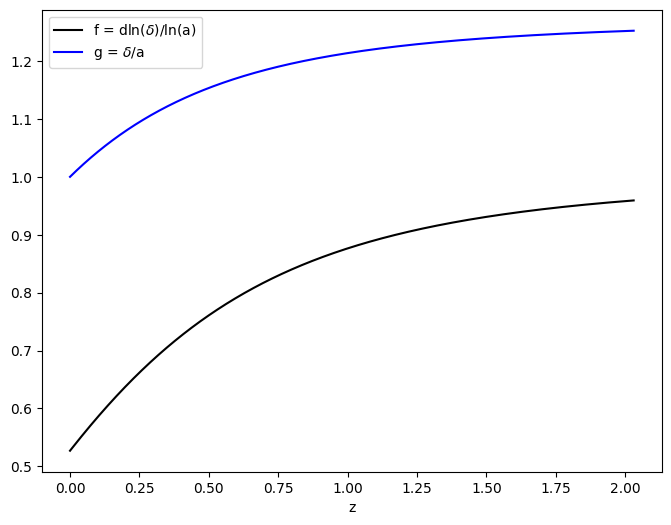

In [58]:
g = delta/a     #delta/a

plt.figure(figsize=(8, 6))
plt.xlabel('z')
plt.plot(z, f, color='black', label='f = dln($\delta$)/ln(a)')
plt.plot(z, g, color='blue', label='g = $\delta$/a')
plt.legend()
plt.show()

# Vamos resolver a equação (1) do artigo do Linder e Cahn.

In [59]:
# definindo O_m
Om = ccl.background.omega_x(cosmo, a, 'matter')

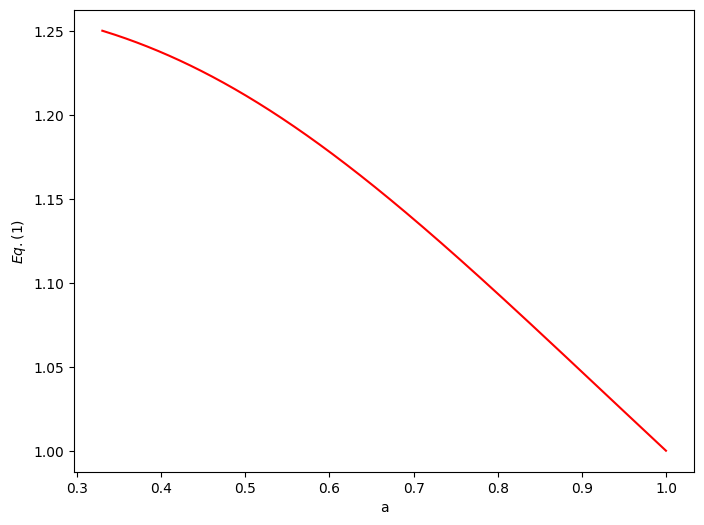

In [60]:
from scipy.integrate import cumtrapz


# vamos definir a equação (1) do artigo
gamma = 6./11.

I = cumtrapz(((Om ** gamma) - 1)/a, x=a, initial=0.000001)

G_a = np.exp(I)

G_a = G_a/G_a[-1]

# vamos plotar a equação
plt.figure(figsize=(8, 6))
plt.plot(a, G_a, color='red')
plt.xlabel('a')
plt.ylabel('$Eq. (1)$')
plt.show()

# Agora, vamos plotar g = $\delta$/a.

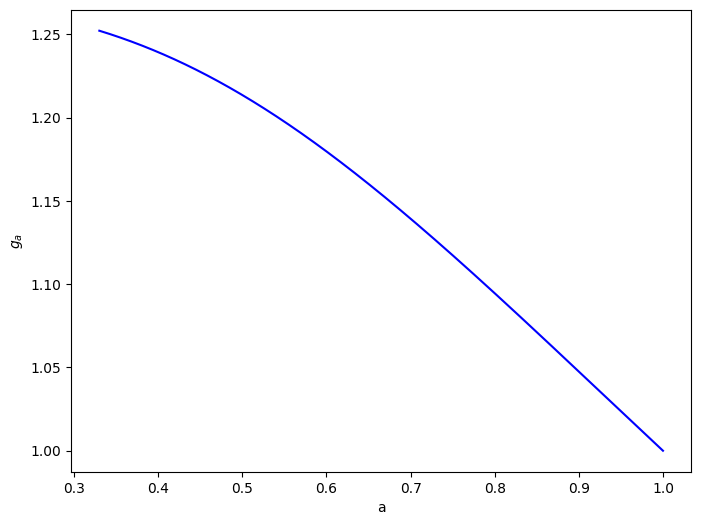

In [61]:
# vamos plotar delta/a
plt.figure(figsize=(8, 6))
plt.plot(a, g, color='blue')
plt.xlabel('a')
plt.ylabel('$g_a$')
plt.show()

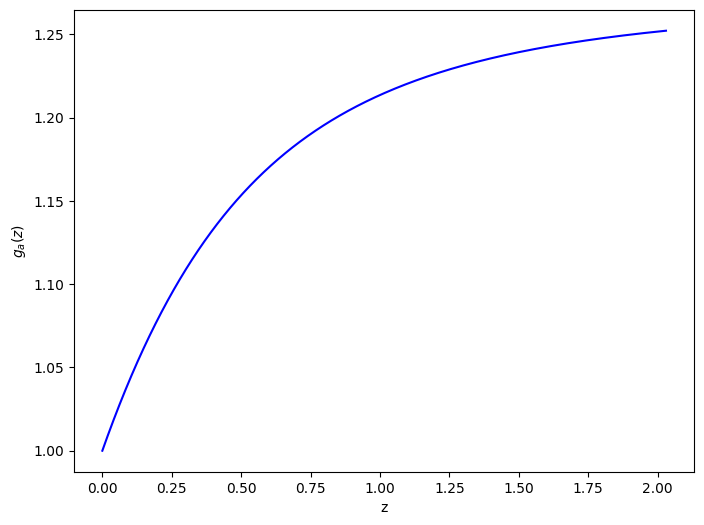

In [62]:
# vamos plotar delta/a
plt.figure(figsize=(8, 6))
plt.plot(z, g, color='blue')
plt.xlabel('z')
plt.ylabel('$g_a(z)$')
plt.show()

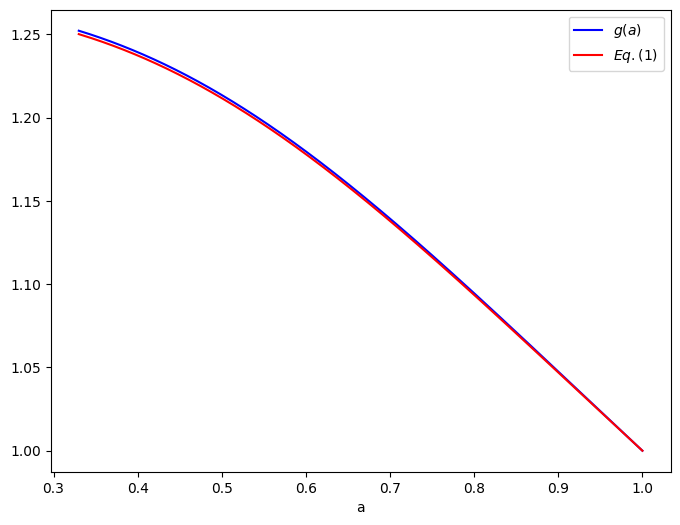

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(a, g, color='blue', label='$g(a)$')
plt.plot(a, G_a, color='red', label='$Eq. (1)$')
plt.xlabel('a')
plt.legend()
plt.show()

# Agora, vamos calcular a diferença entre as curvas.

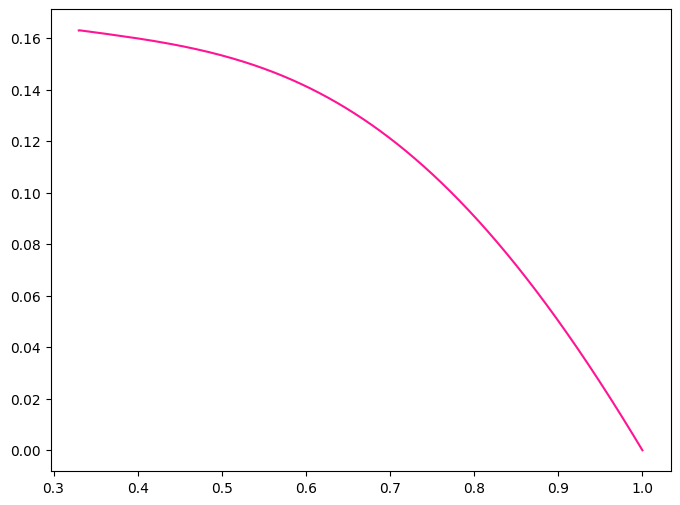

In [64]:
dif = abs((G_a - g)/g) * 100

plt.figure(figsize=(8, 6))
plt.plot(a, dif, color='deeppink')
plt.show()

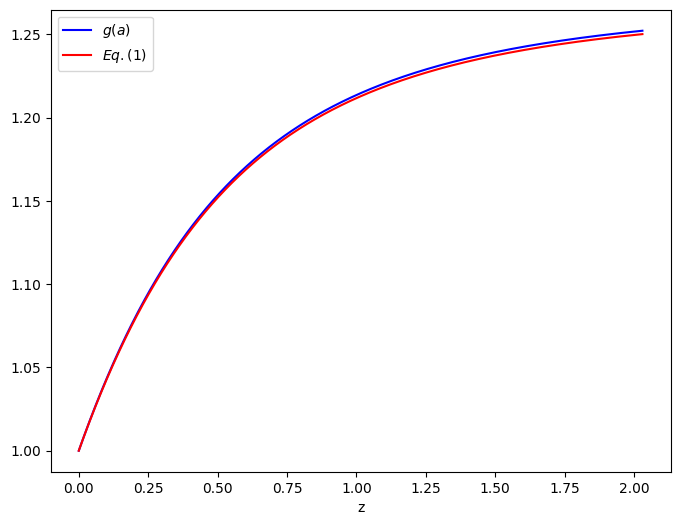

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(z, g, color='blue', label='$g(a)$')
plt.plot(z, G_a, color='red', label='$Eq. (1)$')
plt.xlabel('z')
plt.legend()
plt.show()

Agora, vamos plotar $G(a) = \frac{d ln(\delta/a)}{d ln (a)}$ x $z$.

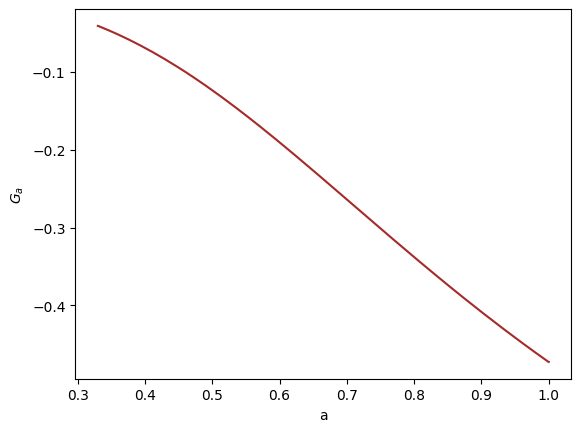

In [66]:
# definindo G(a)
g = delta/a 
x = np.log(a)
y = np.log(g)

dy_dx = np.gradient(y, x)

plt.plot(a, dy_dx, color='brown')
plt.xlabel('a')
plt.ylabel('$G_a$')
plt.show()

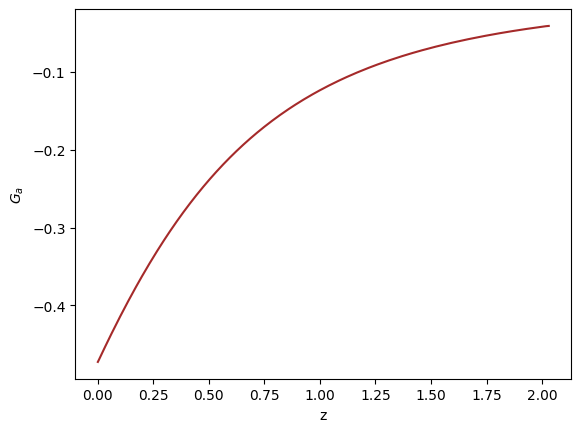

In [67]:
plt.plot(z, dy_dx, color='brown')
plt.xlabel('z')
plt.ylabel('$G_a$')
plt.show()

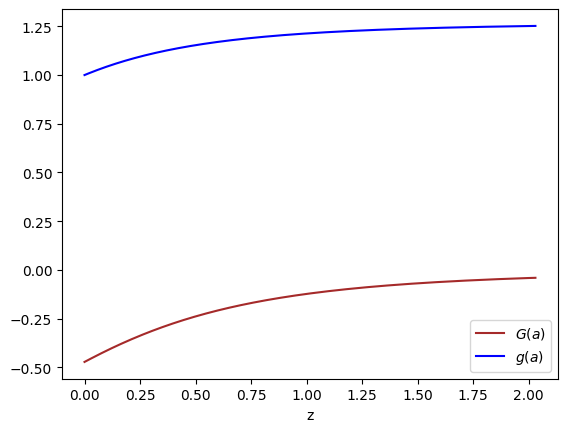

In [68]:
plt.plot(z, dy_dx, color='brown', label='$G(a)$')
plt.plot(z, g, color='blue', label='$g(a)$')
plt.xlabel('z')
plt.legend()
plt.show()